In [ ]:
%pip install -r "requirements.txt"

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Imports and helper utilities
import gensim.downloader as api
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings("ignore")

MODEL_MAP = {
    "glove": "glove-wiki-gigaword-100",
    "fasttext": "fasttext-wiki-news-subwords-300",
    "word2vec": "word2vec-google-news-300",
}
_cache = {}

def load_model(name, verbose=True):
    if name in _cache:
        return _cache[name]
    key = MODEL_MAP.get(name)
    if not key:
        raise ValueError(f\
)
    if verbose:
        print(f\
)
    model = api.load(key)
    _cache[name] = model
    if verbose:
        print(\
)
    return model

def similarity(model, w1, w2):
    try:
        s = model.similarity(w1, w2)
    except Exception:
        print(f\
)
        return None
    print(f\
)
    return s

def analogy(model, a, b, c, topn=5):
    try:
        res = model.most_similar(positive=[a, c], negative=[b], topn=topn)
    except Exception as e:
        print(f\
        return []
    print(f\
    for word, score in res:
        print(f\
)
    return res

def visualize(model, topn=200, method=\
, out=None):
    keys = model.index_to_key[:topn]
    vecs = np.array([model[k] for k in keys])
    if method == \"pca\":
        proj = PCA(n_components=2).fit_transform(vecs)
    else:
        proj = TSNE(n_components=2, init=\"pca\", random_state=42).fit_transform(vecs)
    plt.figure(figsize=(12, 9))
    xs, ys = proj[:, 0], proj[:, 1]
    plt.scatter(xs, ys, s=10)
    for x, y, label in zip(xs, ys, keys):
        plt.text(x + 0.3, y + 0.3, label, fontsize=8)
    plt.title(f\
)
    plt.tight_layout()
    if out:
        plt.savefig(out, dpi=200)
        print(f\
)
    plt.show()

def demo_oov(models, word):
    print(f\
    for name, model in models.items():
        try:
            vec = model[word]
            print(f\
        except Exception:
            print(f\


## Load models

In [ ]:
load_full = False
if load_full:
    fasttext = load_model('fasttext')
    glove = load_model('glove')

else:
   
    fasttext = None
    glove = None
    word2vec = None

In [19]:
# Quick small-model demo to avoid large downloads
from gensim.models import Word2Vec, FastText
print('Loading a small GloVe model for fast demos (glove-twitter-25)...')
glove_small = api.load('glove-twitter-25')
print('Training small toy Word2Vec and FastText models for comparison (fast, local)...')
sentences = [
    ['king','man','woman','queen','prince','princess'],
    ['paris','france','london','england','berlin','germany'],
    ['apple','orange','fruit','mango','banana'],
    ['computer','software','hardware','programming','python','code']
]
toy_w2v = Word2Vec(sentences, vector_size=50, window=3, min_count=1, epochs=30)
toy_ft = FastText(sentences, vector_size=50, window=3, min_count=1, epochs=30)
print('Toy models trained.')
# Assign small-demo defaults to the common names used elsewhere when not loading full models
if not load_full:
    fasttext = toy_ft.wv
    glove = glove_small
    word2vec = toy_w2v.wv

Loading a small GloVe model for fast demos (glove-twitter-25)...
Training small toy Word2Vec and FastText models for comparison (fast, local)...
Toy models trained.


In [20]:
# Similarity & Analogy comparisons (small/demo models)
print("GloVe-small similarity (glove-twitter-25):")
try:
    print(' king vs queen ->', glove_small.similarity('king','queen'))
except Exception as e:
    print('GloVe-small similarity error:', e)

print("GloVe-small analogy (king - man + woman):")
try:
    print(glove_small.most_similar(positive=['king','woman'], negative=['man'], topn=5))
except Exception as e:
    print('GloVe-small analogy error:', e)

print("Toy Word2Vec similarity:")
print(' king vs queen ->', toy_w2v.wv.similarity('king','queen'))
print("Toy FastText similarity:")
print(' king vs queen ->', toy_ft.wv.similarity('king','queen'))

GloVe-small similarity (glove-twitter-25):
 king vs queen -> 0.9202422
GloVe-small analogy (king - man + woman):
[('meets', 0.8841923475265503), ('prince', 0.832163393497467), ('queen', 0.8257461190223694), ('’s', 0.8174097537994385), ('crow', 0.813499391078949)]
Toy Word2Vec similarity:
 king vs queen -> 0.16565883
Toy FastText similarity:
 king vs queen -> 0.11771917


In [21]:
# OOV demonstration: FastText (toy_ft) should provide a vector for many OOV tokens via subwords
oov = 'technobabbleword_xyz'
print('OOV demo for:', oov)
for name, m in [('glove_small', glove_small), ('toy_w2v', toy_w2v.wv), ('toy_ft', toy_ft.wv)]:
    try:
        v = m[oov]
        print(f"{name}: returned vector (len={len(v)})")
    except Exception as e:
        print(f"{name}: error - {type(e).__name__}")

# Also test a made-up token that may share subwords with training tokens
test_oov = 'progpy'
print('\nTest token:', test_oov)
for name, m in [('toy_w2v', toy_w2v.wv), ('toy_ft', toy_ft.wv)]:
    try:
        v = m[test_oov]
        print(f"{name}: '{test_oov}' -> vector len={len(v)}")
    except Exception as e:
        print(f"{name}: '{test_oov}' -> {type(e).__name__}")

OOV demo for: technobabbleword_xyz
glove_small: error - KeyError
toy_w2v: error - KeyError
toy_ft: returned vector (len=50)

Test token: progpy
toy_w2v: 'progpy' -> KeyError
toy_ft: 'progpy' -> vector len=50


## Similarity examples

In [4]:
# FastText similarity
similarity(fasttext, 'king', 'queen')
similarity(fasttext, 'man', 'woman')

# GloVe similarity
similarity(glove, 'king', 'queen')
similarity(glove, 'man', 'woman')

Similarity(king, queen) = 0.7704
Similarity(man, woman) = 0.8120
Similarity(king, queen) = 0.7508
Similarity(man, woman) = 0.8323


np.float32(0.8323495)

## Analogy: king - man + woman ≈ queen

In [ ]:
print('FastText:')
analogy(fasttext, 'king', 'man', 'woman', topn=5)
print('\nGloVe:')
analogy(glove, 'king', 'man', 'woman', topn=5)

FastText:
Analogy: king - man + woman ->
  queen                0.7787
  queen-mother         0.7144
  king-                0.6981
  queen-consort        0.6725
  monarch              0.6667

GloVe:
Analogy: king - man + woman ->
  queen                0.7699
  monarch              0.6843
  throne               0.6756
  daughter             0.6595
  princess             0.6521


[('queen', 0.7698540687561035),
 ('monarch', 0.6843381524085999),
 ('throne', 0.6755736470222473),
 ('daughter', 0.6594556570053101),
 ('princess', 0.6520534157752991)]

## OOV (Out-Of-Vocabulary)

In [7]:
oov_word = 'technobabbleword_xyz'
models = {'fasttext': fasttext, 'glove': glove}
demo_oov(models, oov_word)

Demonstrating OOV behavior for word: 'technobabbleword_xyz'
fasttext: KeyError or no vector — word not in vocabulary.
glove: KeyError or no vector — word not in vocabulary.


## Visualization (PCA / t-SNE)

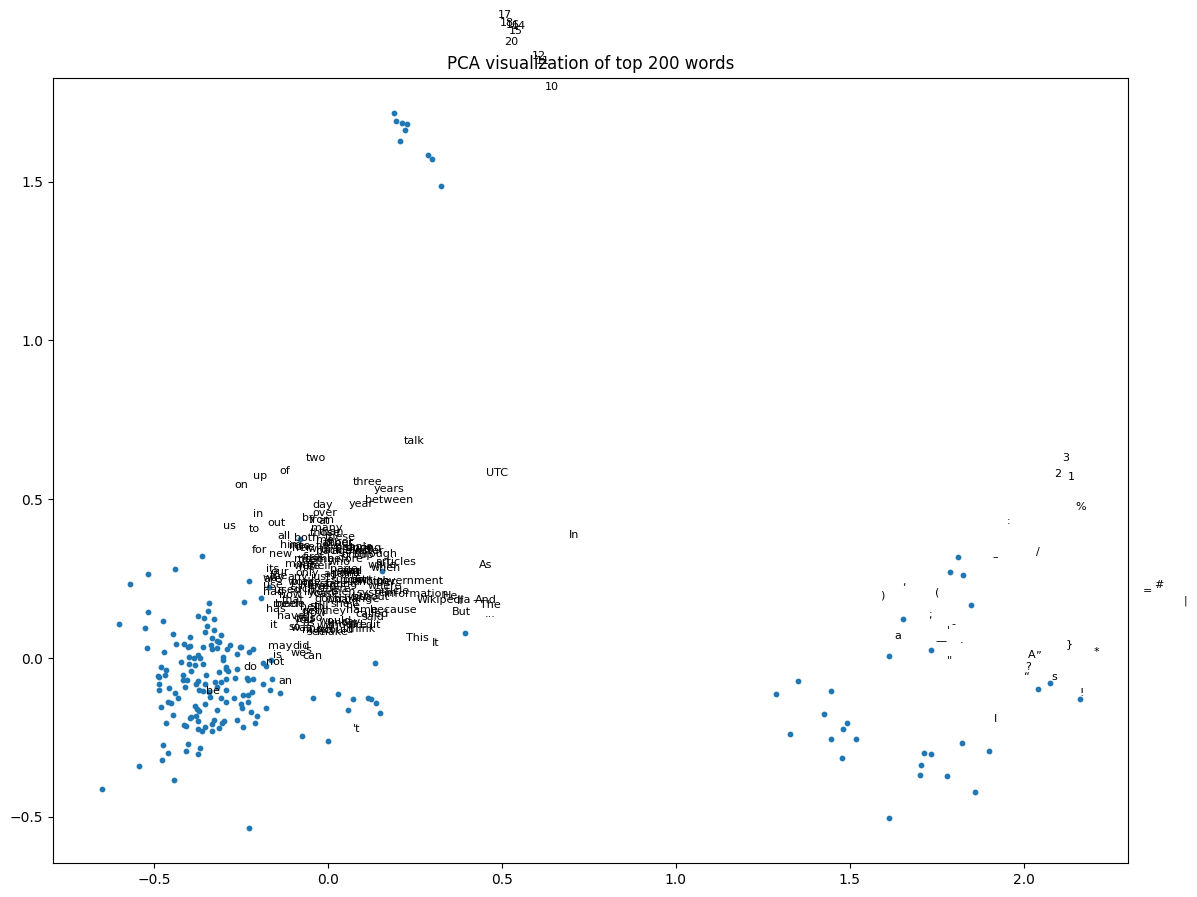

In [8]:
# PCA visualization of top 200 words from FastText
visualize(fasttext, topn=200, method='pca')

# t-SNE (slower)
# visualize(fasttext, topn=200, method='tsne')